In [1]:
'''
Problem Statements: 4.	In the recruitment domain, HR faces the challenge of predicting if the candidate is faking their salary or not.
For example, a candidate claims to have 5 years of experience and earns 70,000 per month working as a regional manager. The candidate expects
more money than his previous CTC. We need a way to verify their claims (is 70,000 a month working as a regional manager with an experience of 5 years
a genuine claim or does he/she make less than that?) Build a Decision Tree and Random Forest model with monthly income as the target variable. 


1.1.	What is the business objective?
HR professionals often face challenges in verifying the salary claims made by candidates during recruitment.
Identify patterns and relationships between job roles, experience, and salaries.
Detect potential discrepancies in candidates’ claimed salaries by predicting if the stated income aligns with the observed data trends.

1.2 	Are there any constraints?
Verify Candidate Claims, Ensure transparency and accuracy in salary claims by candidates during recruitment.
Provide HR teams with a data-driven tool to validate candidates' claims and adjust offers accordingly.
Optimize Recruitment Costs Avoid unnecessary resource allocation or salary mismatches by relying on predictive models.
'''

"\nProblem Statements: 4.\tIn the recruitment domain, HR faces the challenge of predicting if the candidate is faking their salary or not.\nFor example, a candidate claims to have 5 years of experience and earns 70,000 per month working as a regional manager. The candidate expects\nmore money than his previous CTC. We need a way to verify their claims (is 70,000 a month working as a regional manager with an experience of 5 years\na genuine claim or does he/she make less than that?) Build a Decision Tree and Random Forest model with monthly income as the target variable. \n\n\n1.1.\tWhat is the business objective?\nHR professionals often face challenges in verifying the salary claims made by candidates during recruitment.\nIdentify patterns and relationships between job roles, experience, and salaries.\nDetect potential discrepancies in candidates’ claimed salaries by predicting if the stated income aligns with the observed data trends.\n\n1.2 \tAre there any constraints?\nVerify Candid

In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
data = pd.read_csv('HR_DT.csv')

In [4]:
#Preprocessing and EDA

In [5]:
data.describe()

,no of Years of Experience of employee,monthly income of employee
count,196.000000,196.000000
mean,5.112245,74194.923469
std,2.783993,26731.578387
min,1.000000,37731.000000
25%,3.000000,56430.000000
50%,4.100000,63831.500000
75%,7.100000,98273.000000
max,10.500000,122391.000000


In [6]:
data.head()

,Position of the employee,no of Years of Experience of employee,monthly income of employee
0,Business Analyst,1.1,39343
1,Junior Consultant,1.3,46205
2,Senior Consultant,1.5,37731
3,Manager,2.0,43525
4,Country Manager,2.2,39891


In [7]:
data.columns

Index(['Position of the employee', 'no of Years of Experience of employee',
       ' monthly income of employee'],
      dtype='object')

In [8]:
data.dtypes

Position of the employee                  object
no of Years of Experience of employee    float64
 monthly income of employee                int64
dtype: object

In [9]:
data.isnull().sum()

Position of the employee                 0
no of Years of Experience of employee    0
 monthly income of employee              0
dtype: int64

In [11]:
#from above all obesrvation data look balanced and no need of any change till now
#BUT THE COLUMN NAMES LOOKS HARD TO HANDLE AS LONG

In [12]:
# Rename columns for ease of use
data.columns = ["Position", "YearsExperience", "MonthlyIncome"]

In [14]:
# Encode the categorical variable 'Position'
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Position'] = label_encoder.fit_transform(data['Position'])

In [15]:
# Split the dataset into features and target variable
X = data.drop('MonthlyIncome', axis=1)
y = data['MonthlyIncome']

In [16]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
# Build the Decision Tree model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [20]:
# Predict the target variable for the test set
y_pred_dt = dt_model.predict(X_test)

In [21]:
# Evaluate the Decision Tree model
print("Decision Tree Model Performance:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_dt))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_dt))
print("R^2 Score:", r2_score(y_test, y_pred_dt))

Decision Tree Model Performance:
Mean Absolute Error: 1160.4322033898304
Mean Squared Error: 9161032.13983051
R^2 Score: 0.9851941860434696


In [22]:
# Build the Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [23]:
# Predict the target variable for the test set
y_pred_rf = rf_model.predict(X_test)

In [24]:
# Evaluate the Random Forest model
print("\nRandom Forest Model Performance:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_rf))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_rf))
print("R^2 Score:", r2_score(y_test, y_pred_rf))


Random Forest Model Performance:
Mean Absolute Error: 1888.4096557707826
Mean Squared Error: 9910747.525037518
R^2 Score: 0.9839825161852817


In [29]:
'''THIS WAS ALL NEEDED . THOUGH THERE IS NO NEED TO PLOT THE GRAPHS BUT FOR MORE VISUAL UNDRSTANDING OF US LETS PLOT IT GET THE FINAL CONCLUSION.'''

'THIS WAS ALL NEEDED . THOUGH THERE IS NO NEED TO PLOT THE GRAPHS BUT FOR MORE VISUAL UNDRSTANDING OF US LETS PLOT IT GET THE FINAL CONCLUSION.'

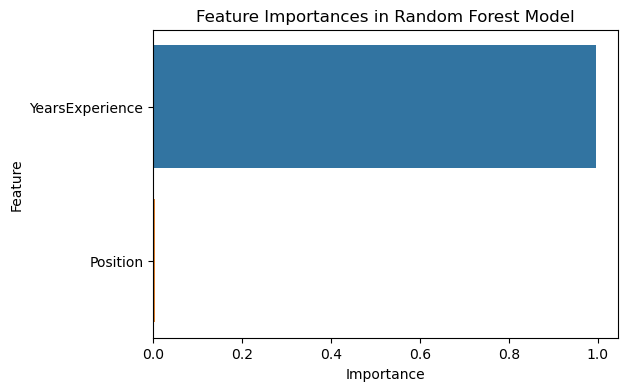

In [27]:
# Plot feature importance for the Random Forest model
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importances = feature_importances.sort_values('Importance', ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances in Random Forest Model')
plt.show()

In [26]:
'''CONCLUSION'''
#THERE ARE ONLY TWO COLUMNS SO THERE IS NO MUCH NEED OF PLOTTING THE GRAPH
#YEAR EXPERIENCE > POSITION

'CONCLUSION'

In [30]:
#6.	Write about the benefits/impact of the solution - in what way does the business (client) benefit from the solution provided?
'''
1.Enhanced Accuracy in Recruitment Decisions
2.Optimized Salary Offers
3.Fraud Detection
4.Prevents financial losses due to inflated salary offers.
'''

'\n1.Enhanced Accuracy in Recruitment Decisions\n2.Optimized Salary Offers\n3.Fraud Detection\n4.Prevents financial losses due to inflated salary offers.\n'